In [1]:
#!/usr/bin/env Rscript
#
##
### author: zhzhang
### e-mail: zhzhang2015@sina.com / zhenghua.zhang217@gmail.com
### data  : 2018.10.31
##
#
################################################################################

In [2]:
# Logging function
lg.info <- function(m, ln='INFO'){ 
    timeStamp <- strftime(Sys.time(), "%Y-%m-%d,%H:%M:%S")
    reporterName <- commandArgs()
    levelName <- ln
    message(timeStamp, ' <', reporterName[4], '> ', levelName, ': ', m)
}

lg.info('=== Start ===')

2018-11-02,09:31:38 <IRkernel::main()> INFO: === Start ===


In [3]:
# Loading necessay library
lg.info('Loading necessay library...')
library(ggplot2)
library(dplyr)

# library(ggpubr)
# library(boot)
# library(gridExtra)
# library(grid)
library(GGally)

2018-11-02,09:31:39 <IRkernel::main()> INFO: Loading necessay library...

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [4]:
# Arrange working dirs
lg.info('Arranging working dirs...')
hmDir <- '/home/umcg-zzhang'
pjDir <- paste0(hmDir, '/projects', '/ASEpredictor')
pjIpDir <- paste0(pjDir, '/inputs')
pjOpDir <- paste0(pjDir, '/outputs')
pjScDir <- paste0(pjDir, '/scripts')
pjMsDir <- paste0(pjDir, '/miscellanies')
pjTpDir <- paste0(pjDir, '/tmp')

2018-11-02,09:31:44 <IRkernel::main()> INFO: Arranging working dirs...


In [5]:
# Arrange input and output files
lg.info('Arranging input and ouput files...')

## Input files
pjIpFile <- paste0(pjOpDir, '/biosGavinOverlapCov10', '/biosGavinOverlapCov10AnnoFilteredByAf0.001.tsv')

## Output files
# pjOpFile = paste0(pjOpDir, '/biosGavinOverlapCov10AnnoFiltered.tsv')

#
##
### log2FC = log2(altCountsBios / refCountsBios)
##
#

df <- read.csv(pjIpFile, header=1, sep='\t')
df$chr <- as.factor(df$chr)

2018-11-02,09:31:46 <IRkernel::main()> INFO: Arranging input and ouput files...


In [6]:
colnames(df)

[1] "gene"              "chr"               "pos"              
  [4] "ref"               "alt"               "group"            
  [7] "effect"            "impact"            "cadd"             
 [10] "CaddChrom"         "CaddPos"           "CaddRef"          
 [13] "CaddAlt"           "Type"              "Length"           
 [16] "AnnoType"          "Consequence"       "ConsScore"        
 [19] "ConsDetail"        "GC"                "CpG"              
 [22] "motifECount"       "motifEName"        "motifEHIPos"      
 [25] "motifEScoreChng"   "oAA"               "nAA"              
 [28] "GeneID"            "FeatureID"         "GeneName"         
 [31] "CCDS"              "Intron"            "Exon"             
 [34] "cDNApos"           "relcDNApos"        "CDSpos"           
 [37] "relCDSpos"         "protPos"           "relProtPos"       
 [40] "Domain"            "Dst2Splice"        "Dst2SplType"      
 [43] "minDistTSS"        "minDistTSE"        "SIFTcat"          
 [46] "SIFTval"           "PolyPhenCat"       "PolyPhenVal"      
 [49] "priPhCons"         "mamPhCons"         "verPhCons"        
 [52] "priPhyloP"         "mamPhyloP"         "verPhyloP"        
 [55] "bStatistic"        "targetScan"        "mirSVR.Score"     
 [58] "mirSVR.E"          "mirSVR.Aln"        "cHmmTssA"         
 [61] "cHmmTssAFlnk"      "cHmmTxFlnk"        "cHmmTx"           
 [64] "cHmmTxWk"          "cHmmEnhG"          "cHmmEnh"          
 [67] "cHmmZnfRpts"       "cHmmHet"           "cHmmTssBiv"       
 [70] "cHmmBivFlnk"       "cHmmEnhBiv"        "cHmmReprPC"       
 [73] "cHmmReprPCWk"      "cHmmQuies"         "GerpRS"           
 [76] "GerpRSpval"        "GerpN"             "GerpS"            
 [79] "TFBS"              "TFBSPeaks"         "TFBSPeaksMax"     
 [82] "tOverlapMotifs"    "motifDist"         "Segway"           
 [85] "EncH3K27Ac"        "EncH3K4Me1"        "EncH3K4Me3"       
 [88] "EncExp"            "EncNucleo"         "EncOCC"           
 [91] "EncOCCombPVal"     "EncOCDNasePVal"    "EncOCFairePVal"   
 [94] "EncOCpolIIPVal"    "EncOCctcfPVal"     "EncOCmycPVal"     
 [97] "EncOCDNaseSig"     "EncOCFaireSig"     "EncOCpolIISig"    
[100] "EncOCctcfSig"      "EncOCmycSig"       "Grantham"         
[103] "Dist2Mutation"     "Freq100bp"         "Rare100bp"        
[106] "Sngl100bp"         "Freq1000bp"        "Rare1000bp"       
[109] "Sngl1000bp"        "Freq10000bp"       "Rare10000bp"      
[112] "Sngl10000bp"       "dbscSNV.ada_score" "dbscSNV.rf_score" 
[115] "RawScore"          "PHRED"             "gnomad_AF"        
[118] "chrBios"           "posBios"           "refAlleleBios"    
[121] "altAlleleBios"     "refCountsBios"     "altCountsBios"    
[124] "sampleBios"        "pVal"              "FDROverall"       
[127] "FDRPerVariant"     "varInsideChi2Pval" "log2FC"

In [7]:
# ANOVA test for three groups
nlg2fcDf <- df[which(df$log2FC < 0), ]
plg2fcDf <- df[which(df$log2FC > 0), ]

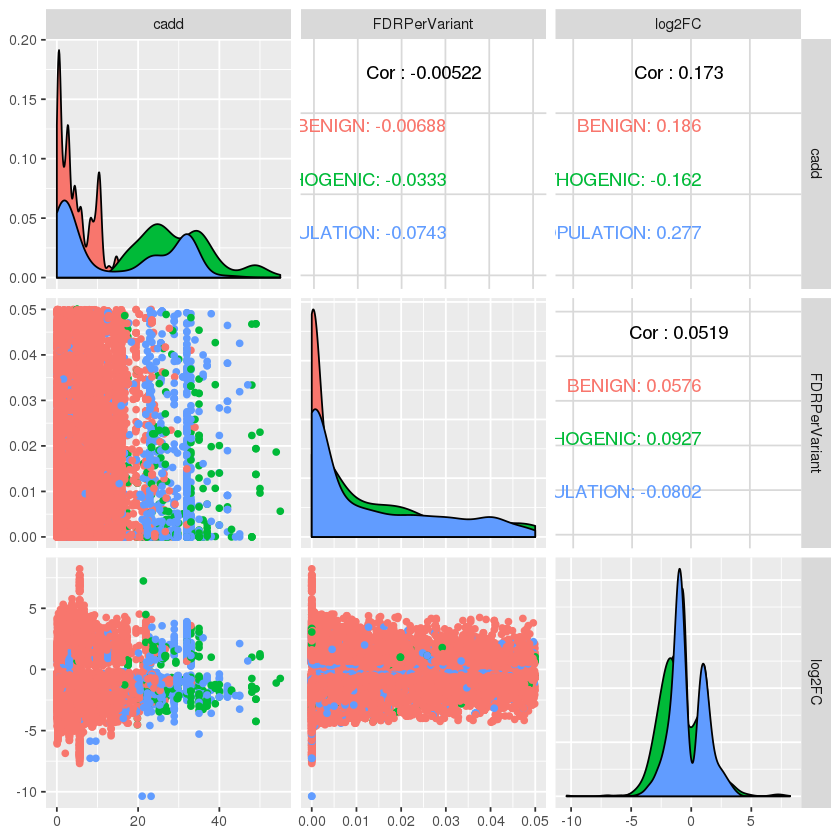

In [9]:
# ggpairs
lg.info('ggpairs, including cadd, logwFC, and FDRPerVariant')
ggpairs(df, aes(color=group), columns=c('cadd', 'FDRPerVariant', 'log2FC'))

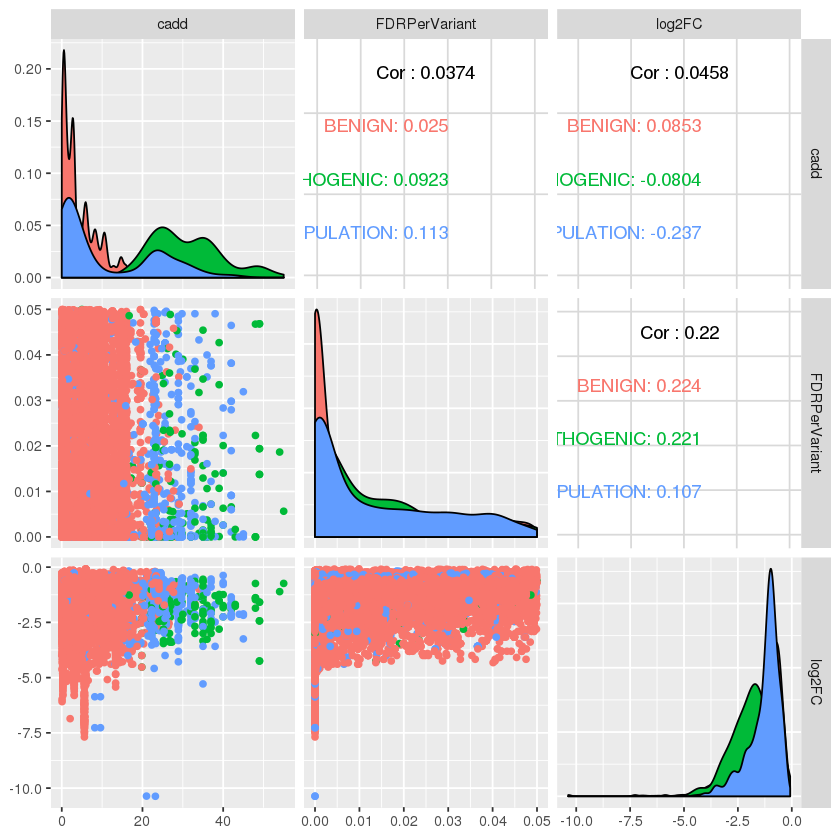

In [11]:
lg.info('ggpairs for log2FC < -1, including cadd, logwFC, and FDRPerVariant')
ggpairs(nlg2fcDf, aes(color=group), columns=c('cadd', 'FDRPerVariant', 'log2FC'))

2018-11-02,09:36:01 <IRkernel::main()> INFO: ggpairs for log2FC > 1, including cadd log2FC, and FDRPerVariant


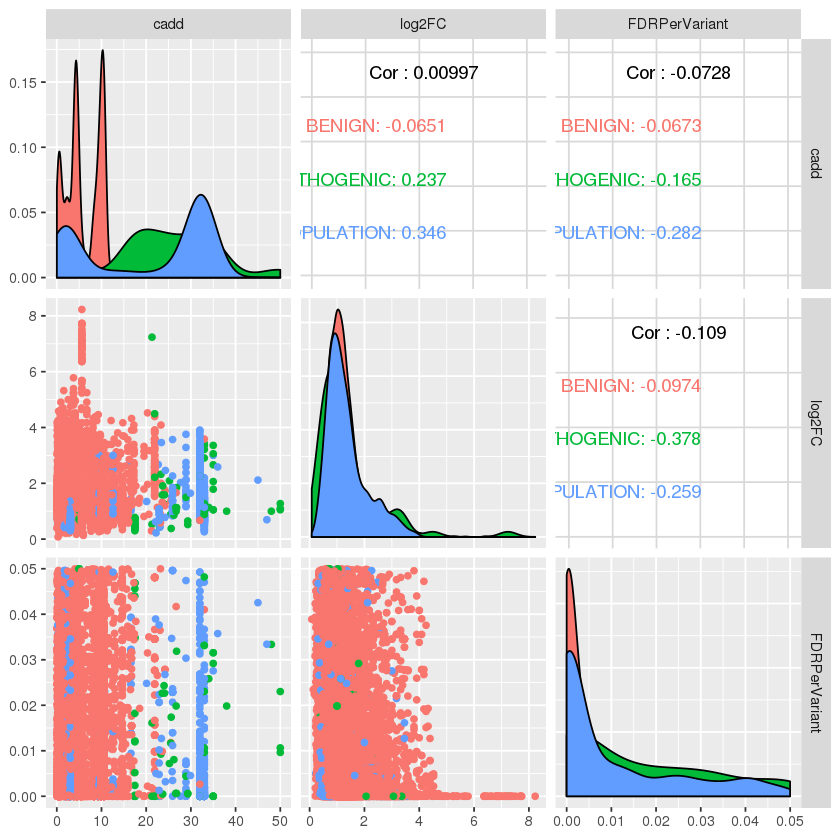

In [13]:
lg.info('ggpairs for log2FC > 1, including cadd log2FC, and FDRPerVariant')
ggpairs(plg2fcDf, aes(color=group), columns=c('cadd', 'log2FC', 'FDRPerVariant'))

In [19]:
# 
##
### We CANNOT seperate BENIGN and PATHOGENIC when the log2fc < -1
## 
#

lg2fc <- aov(log2FC ~ group, data=df)
summary(lg2fc)
TukeyHSD(lg2fc)

               Df Sum Sq Mean Sq F value Pr(>F)    
group           2    222  110.84   43.47 <2e-16 ***
Residuals   41831 106658    2.55                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2FC ~ group, data = df)

$group
                            diff        lwr        upr     p adj
PATHOGENIC-BENIGN     -0.1916166 -0.4505511 0.06731794 0.1923758
POPULATION-BENIGN      0.3301595  0.2454291 0.41488999 0.0000000
POPULATION-PATHOGENIC  0.5217761  0.2506332 0.79291902 0.0000193


In [14]:
# 
##
### We CAN seperate BENIGN and PATHOGENIC when the log2fc < -1
## 
#

nlg2FC <- aov(log2FC ~ group, data=nlg2fcDf)
summary(nlg2FC)
TukeyHSD(nlg2FC)

               Df Sum Sq Mean Sq F value   Pr(>F)    
group           2     64   32.23   34.42 1.18e-15 ***
Residuals   28844  27013    0.94                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2FC ~ group, data = dfNLg2FC)

$group
                            diff        lwr        upr     p adj
PATHOGENIC-BENIGN     -0.3301101 -0.5196147 -0.1406054 0.0001318
POPULATION-BENIGN      0.1981985  0.1333161  0.2630809 0.0000000
POPULATION-PATHOGENIC  0.5283086  0.3289432  0.7276740 0.0000000


In [15]:
# 
##
### We CANNOT seperate BENIGN and PATHOGENIC when the log2fc > 1
## 
#

plg2FC <- aov(log2FC ~ group, data=plg2fcDf)
summary(plg2FC)
TukeyHSD(plg2FC)

               Df Sum Sq Mean Sq F value Pr(>F)
group           2      1  0.2624   0.424  0.654
Residuals   12984   8029  0.6184               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2FC ~ group, data = dfPlg2FC)

$group
                             diff         lwr        upr     p adj
PATHOGENIC-BENIGN      0.04465814 -0.18284929 0.27216558 0.8898865
POPULATION-BENIGN      0.02352019 -0.04485474 0.09189512 0.6991219
POPULATION-PATHOGENIC -0.02113795 -0.25751770 0.21524179 0.9760707


Warning message:
“Removed 1 rows containing missing values (geom_point).”

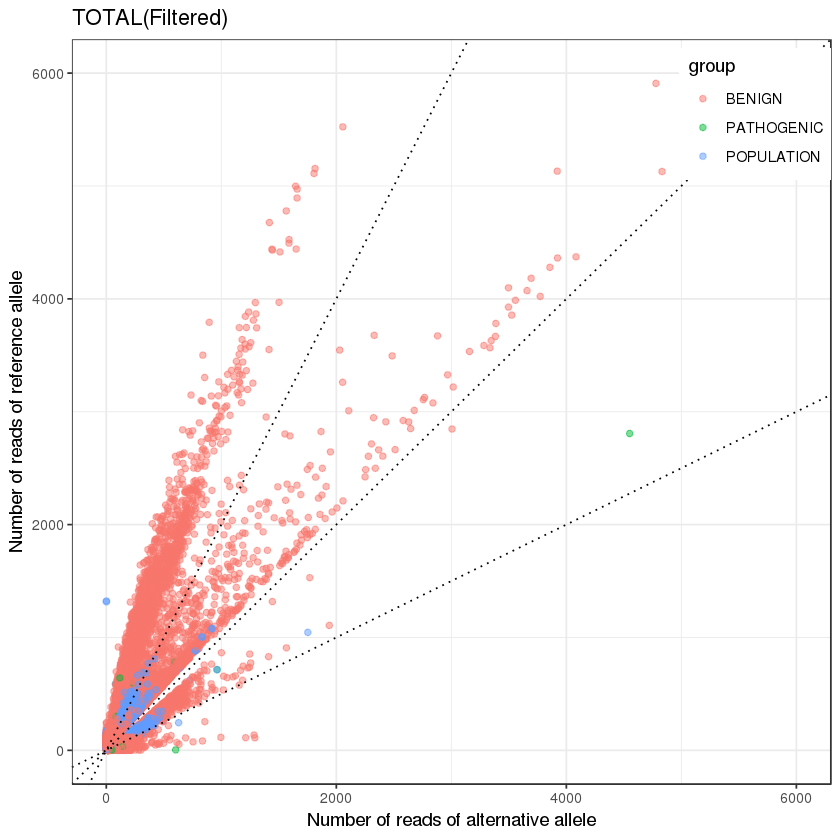

In [126]:
p <- ggplot(data=df, aes(x=altCountsBios, y=refCountsBios, color=group)) + theme_bw()
p <- p + geom_point(alpha=0.5)
p <- p + geom_abline(slope=1, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=0.5, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=2, intercept=0, linetype='dotted')
p <- p + labs( title='TOTAL(Filtered)', y='Number of reads of reference allele', x='Number of reads of alternative allele')
p <- p + lims(x=c(1, 6000), y=c(1, 6000))
p <- p + theme(legend.position=c(0.9, 0.9))
p

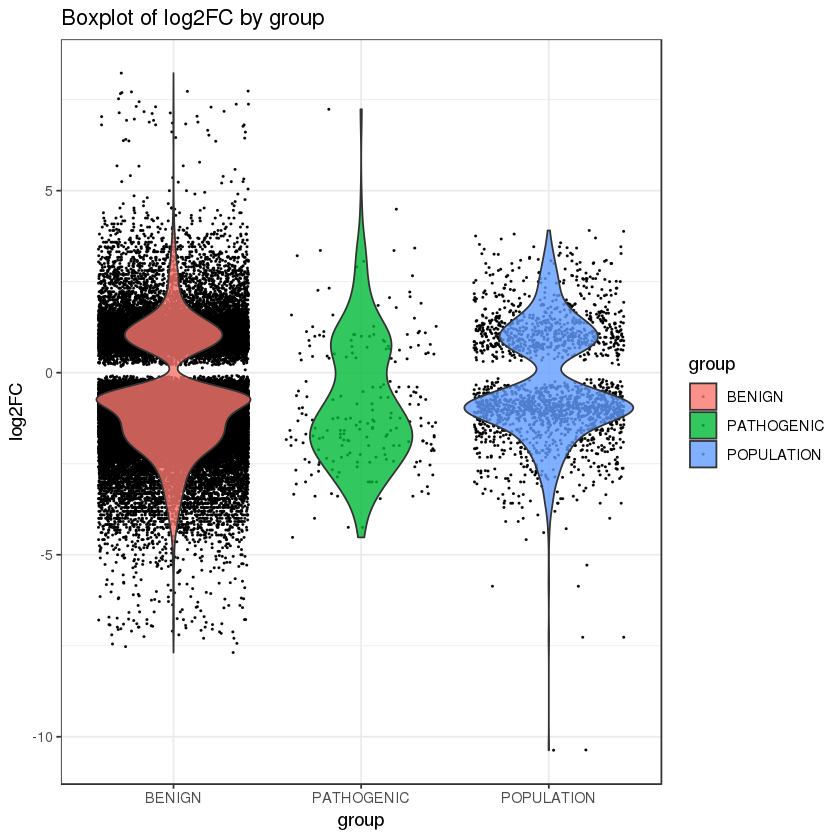

In [127]:
df  %>% 
    ggplot(aes(x=group, y=log2FC, fill=group)) + theme_bw() +
    geom_jitter(size=0.2, alpha=0.9) +
    geom_violin(alpha=0.8) + 
    labs(title='Boxplot of log2FC by group')

In [10]:
# Resampling

#
##
### Permutation for hypothesis test (**THIS IS WHAT WE NEED**)
##
#

#
##
### Bootstrapping for confidence interval(CI) accuracy of 
### population parameters
##
#

set.seed(1234)

dfBn <- df[which(df$group=='BENIGN'), ]
dfPth <- df[which(df$group=='PATHOGENIC'), ]
dfPop <- df[which(df$group=='POPULATION'), ]

idxBn <- rownames(dfBn)
idxPth <- rownames(dfPth)
idxPop <- rownames(dfPop)

# Means of log2FC
cat('Mean of log2FC in BENIGN: ', mean(dfBn[, 'log2FC']), '\n')
cat('Mean of log2FC in PATHOGENIC: ', mean(dfPth[, 'log2FC']), '\n')
cat('Mean of log2FC in POPULATION: ', mean(dfPop[, 'log2FC']), '\n')

# Record number
cat('NO of log2FC in BENIGN: ', length(dfBn[, 'log2FC']), '\n')
cat('NO of log2FC in PATHOGENIC: ', length(dfPth[, 'log2FC']), '\n')
cat('NO of log2FC in POPULATION: ', length(dfPop[, 'log2FC']), '\n')

Mean of log2FC in BENIGN:  -0.6349466 
Mean of log2FC in PATHOGENIC:  -0.8265632 
Mean of log2FC in POPULATION:  -0.3047871 
NO of log2FC in BENIGN:  39572 
NO of log2FC in PATHOGENIC:  210 
NO of log2FC in POPULATION:  2052 


In [11]:
# Plots for raw read counts. 
p <- ggplot() + theme_bw()
p <- p + geom_abline(slope=1, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=0.5, intercept=0, linetype='dotted')
p <- p + geom_abline(slope=2, intercept=0, linetype='dotted')
p <- p + labs(y='Number of reads of reference allele', x='Number of reads of alternative allele')

Warning message:
“Removed 1 rows containing missing values (geom_point).”

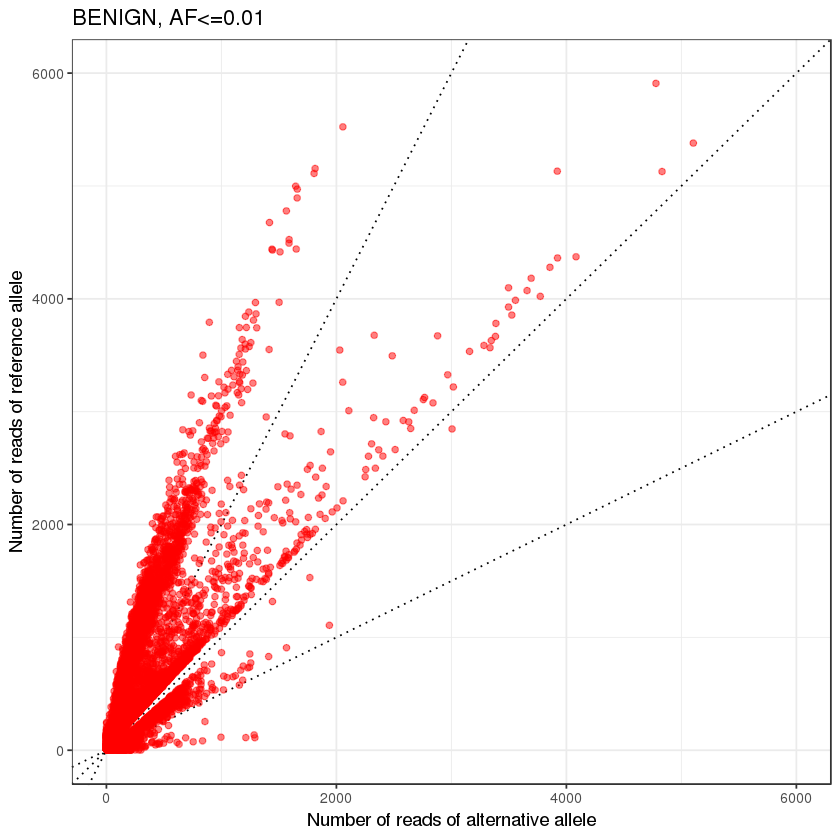

In [12]:
# Plots for raw read counts. BENIGN
p1 <- p + geom_point(data=dfBn, aes(x=altCountsBios, y=refCountsBios), color='red', alpha=0.5)
p1 <- p1 + labs(title='BENIGN, AF<=0.01')
p1 <- p1 + lims(x=c(0, 6000), y=c(0, 6000))
p1

Warning message:
“Removed 1 rows containing missing values (geom_point).”

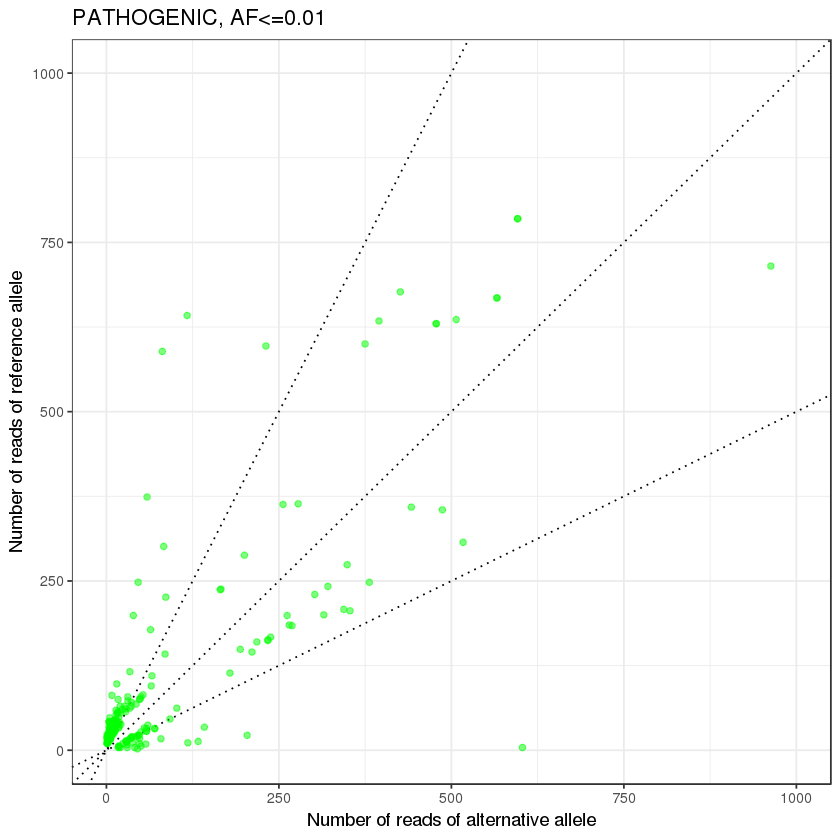

In [13]:
# Plots for raw read counts. PATHOGENIC
p2 <- p + geom_point(data=dfPth, aes(x=altCountsBios, y=refCountsBios), color='green', alpha=0.5)
p2 <- p2 + labs(title='PATHOGENIC, AF<=0.01')
p2 <- p2 + lims(x=c(0, 1000), y=c(0, 1000))
p2

Warning message:
“Removed 1 rows containing missing values (geom_point).”

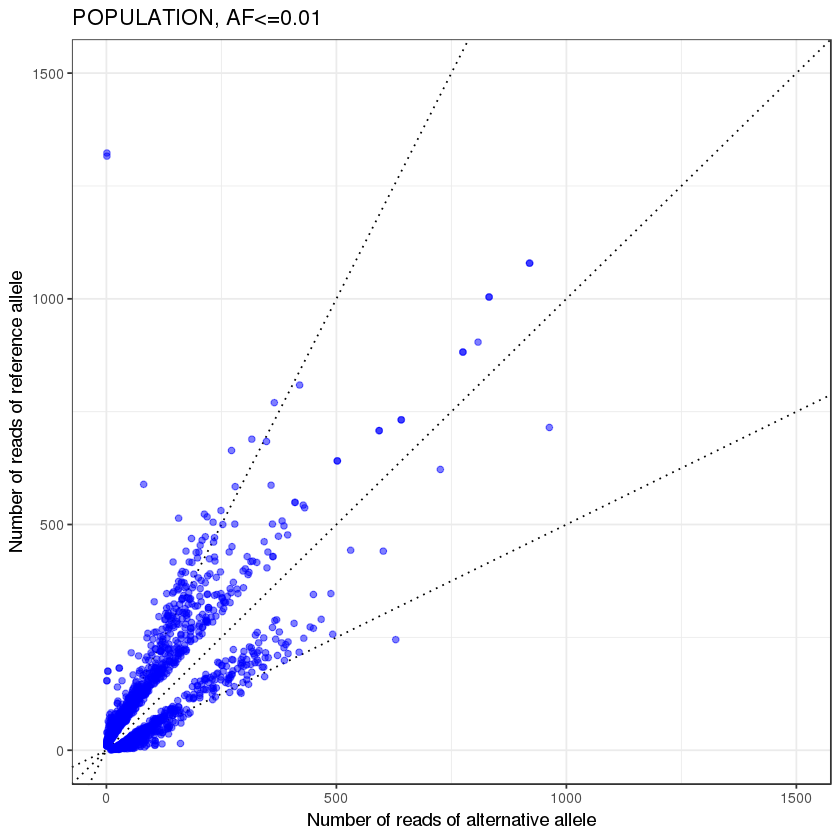

In [14]:
# Plots for raw read counts. POPULATION
p3 <- p + geom_point(data=dfPop, aes(x=altCountsBios, y=refCountsBios), color='blue', alpha=0.5)
p3 <- p3 + labs(title='POPULATION, AF<=0.01')
p3 <- p3 + lims(x=c(0, 1500), y=c(0, 1500))
p3

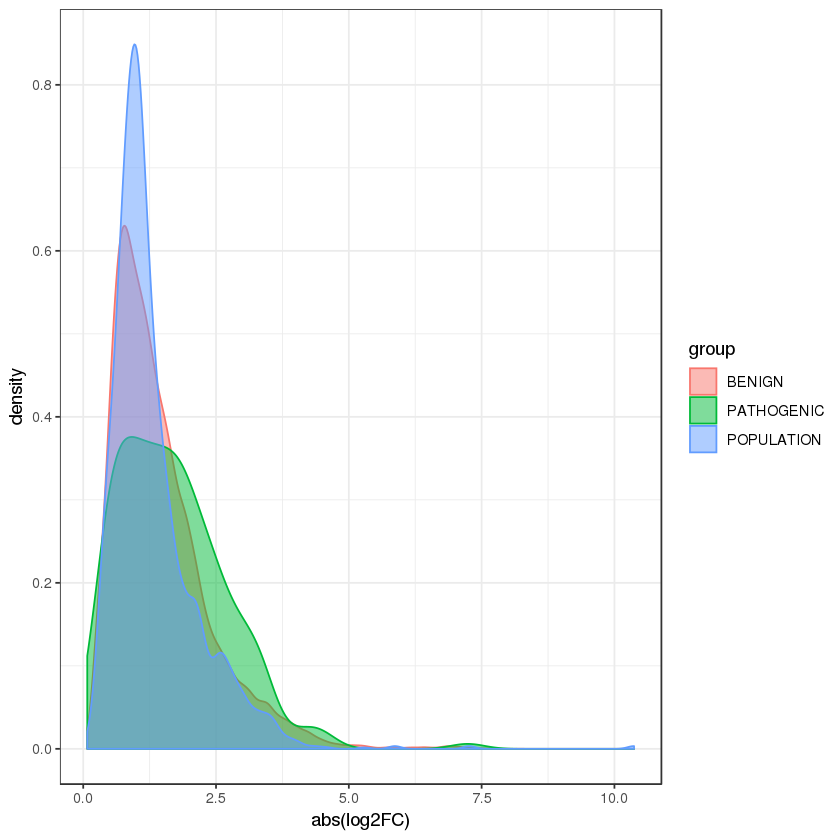

In [84]:
# Plots for density(aka distribution)
p <- ggplot(df) + theme_bw()
p <- p + geom_density(aes(x=abs(log2FC), color=group, fill=group), alpha=0.5)
p

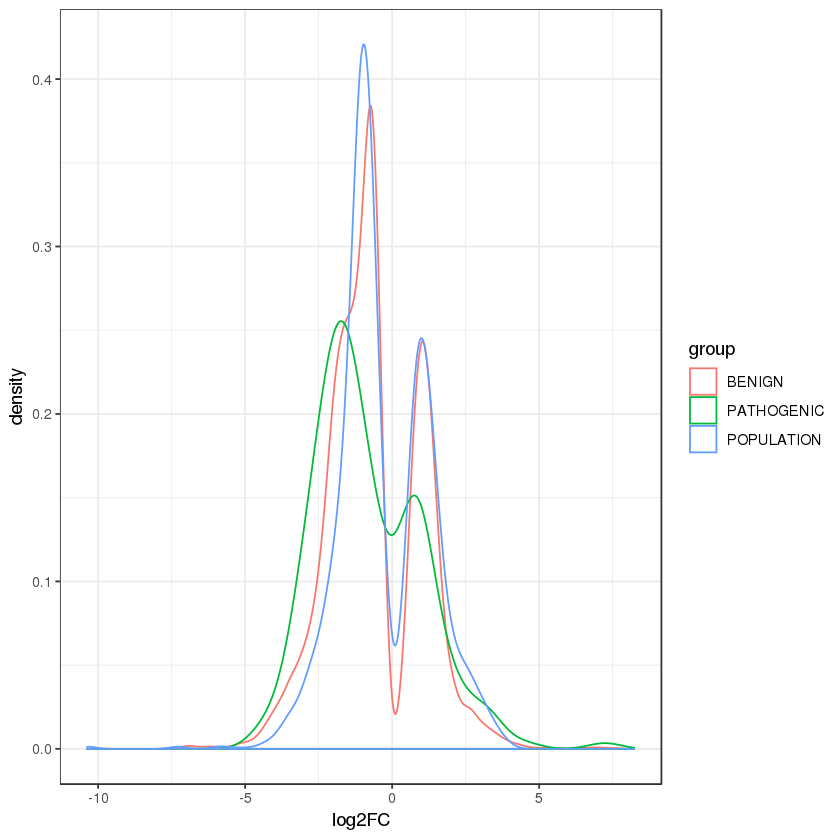

In [82]:
ggplot(df, aes(x=log2FC, y=cadd, color=group)) + theme_bw() +
    geom_density()

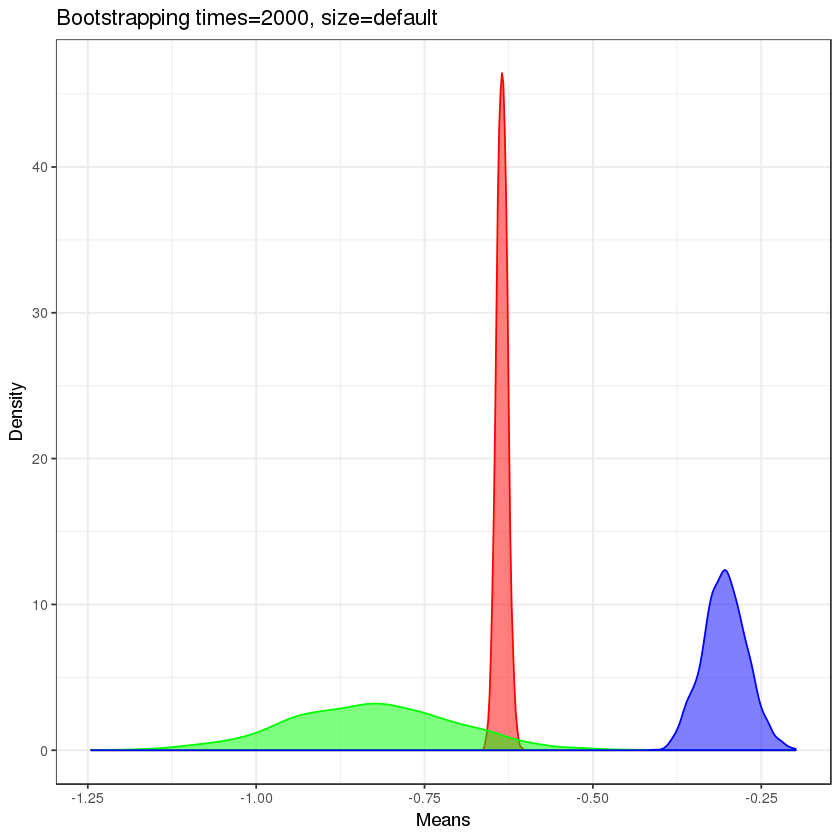

In [15]:
# Bootstrapping 
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(dfBn[sample(idxBn, replace=TRUE), 'log2FC'])) %>% 
    mutate(pthMeans=mean(dfPth[sample(idxPth, replace=TRUE), 'log2FC'])) %>% 
    mutate(popMeans= mean(dfPop[sample(idxPop, replace=TRUE), 'log2FC'])) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) +
    labs(title='Bootstrapping times=2000, size=default', x='Means', y='Density')

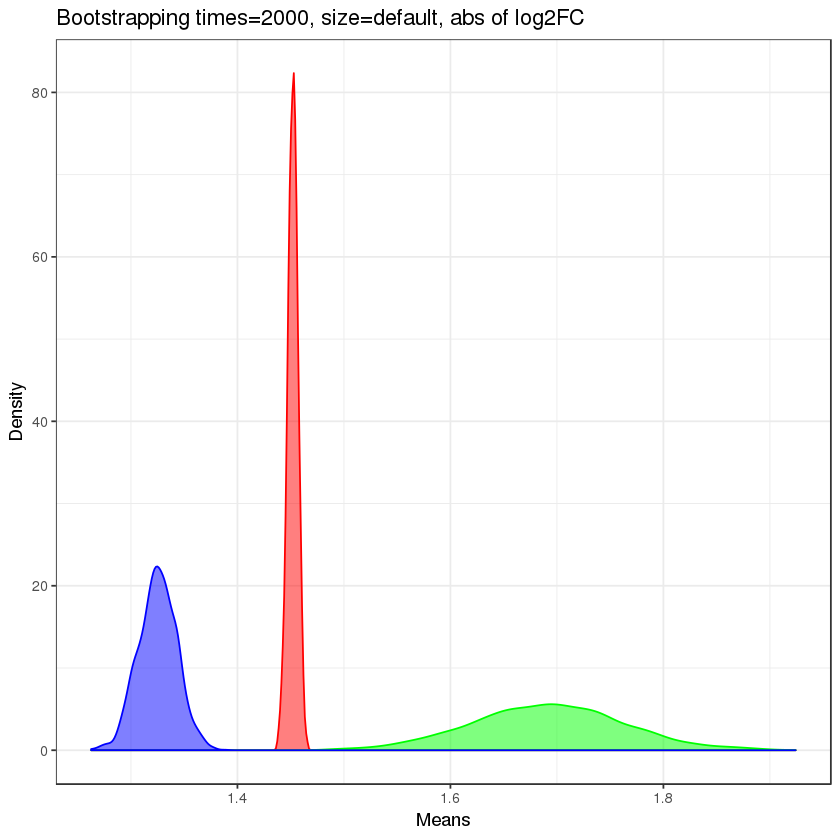

In [16]:
# Bootstrapping. Use the abs of log2FC
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(abs(dfBn[sample(idxBn, replace=TRUE), 'log2FC']))) %>% 
    mutate(pthMeans=mean(abs(dfPth[sample(idxPth, replace=TRUE), 'log2FC']))) %>% 
    mutate(popMeans= mean(abs(dfPop[sample(idxPop, replace=TRUE), 'log2FC']))) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) +
    labs(title='Bootstrapping times=2000, size=default, abs of log2FC', x='Means', y='Density')

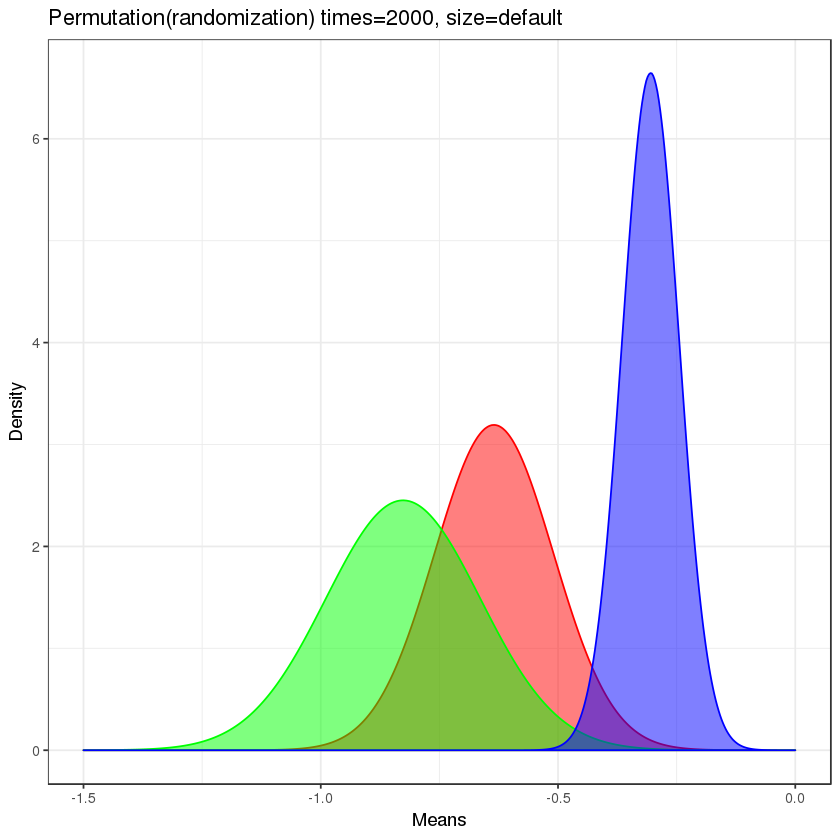

In [17]:
# Permutation. 
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(dfBn[sample(idxBn), 'log2FC'])) %>% 
    mutate(pthMeans=mean(dfPth[sample(idxPth), 'log2FC'])) %>% 
    mutate(popMeans= mean(dfPop[sample(idxPop), 'log2FC'])) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) + 
    lims(x=c(-1.5, 0)) +
    labs(title='Permutation(randomization) times=2000, size=default', x='Means', y='Density')

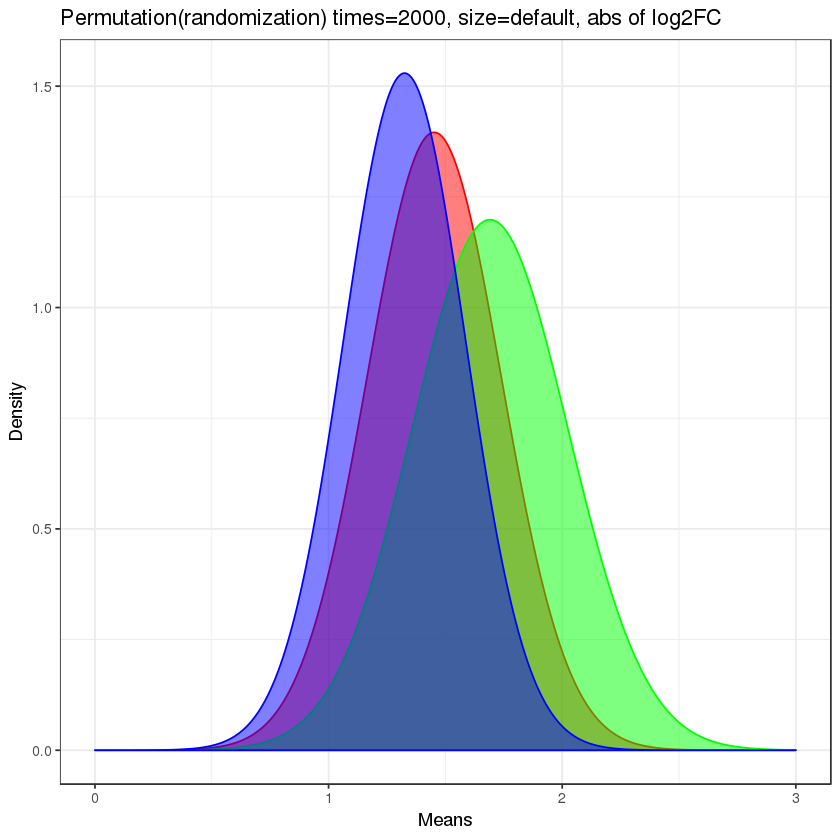

In [18]:
# Permutation, abs of log2FC
set.seed(1234)
data_frame(num = 1:2000) %>% 
    group_by(num) %>% 
    mutate(bnMeans=mean(abs(dfBn[sample(idxBn), 'log2FC']))) %>% 
    mutate(pthMeans=mean(abs(dfPth[sample(idxPth), 'log2FC']))) %>% 
    mutate(popMeans= mean(abs(dfPop[sample(idxPop), 'log2FC']))) %>% 
    ggplot() + theme_bw() + 
    geom_density(aes(x=bnMeans), color='red', fill='red', alpha=0.5) + 
    geom_density(aes(x=pthMeans), color='green', fill='green', alpha=0.5) + 
    geom_density(aes(x=popMeans), color='blue', fill='blue', alpha=0.5) + 
    lims(x=c(0, 3)) + 
    labs(title='Permutation(randomization) times=2000, size=default, abs of log2FC', x='Means', y='Density')

<span style='color:red'> **Necessay to update the "gnomad_AF" column in GAVIN file. there are 152,272(558,879) records with gnomad_AF equal to 0**</span>

**e.g. 10-75879781-A-C, AF in online gnomAD is 0.1154, while the AF in GAVIN is 0.0, and the recordes in GAVIN of this variants is 867, even there are more than 140 in filtered recordes** 

In [49]:
lg.info('=== Done ===')

2018-10-29,09:27:23 <IRkernel::main()> INFO: === Done ===
